About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [2]:
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.shape

(400, 11)

In [5]:
company[company.duplicated()].shape

(0, 11)

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


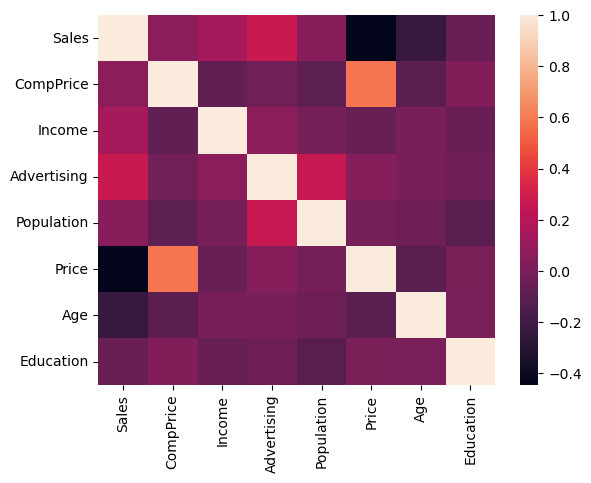

In [7]:
sns.heatmap(company.corr())
company.corr()

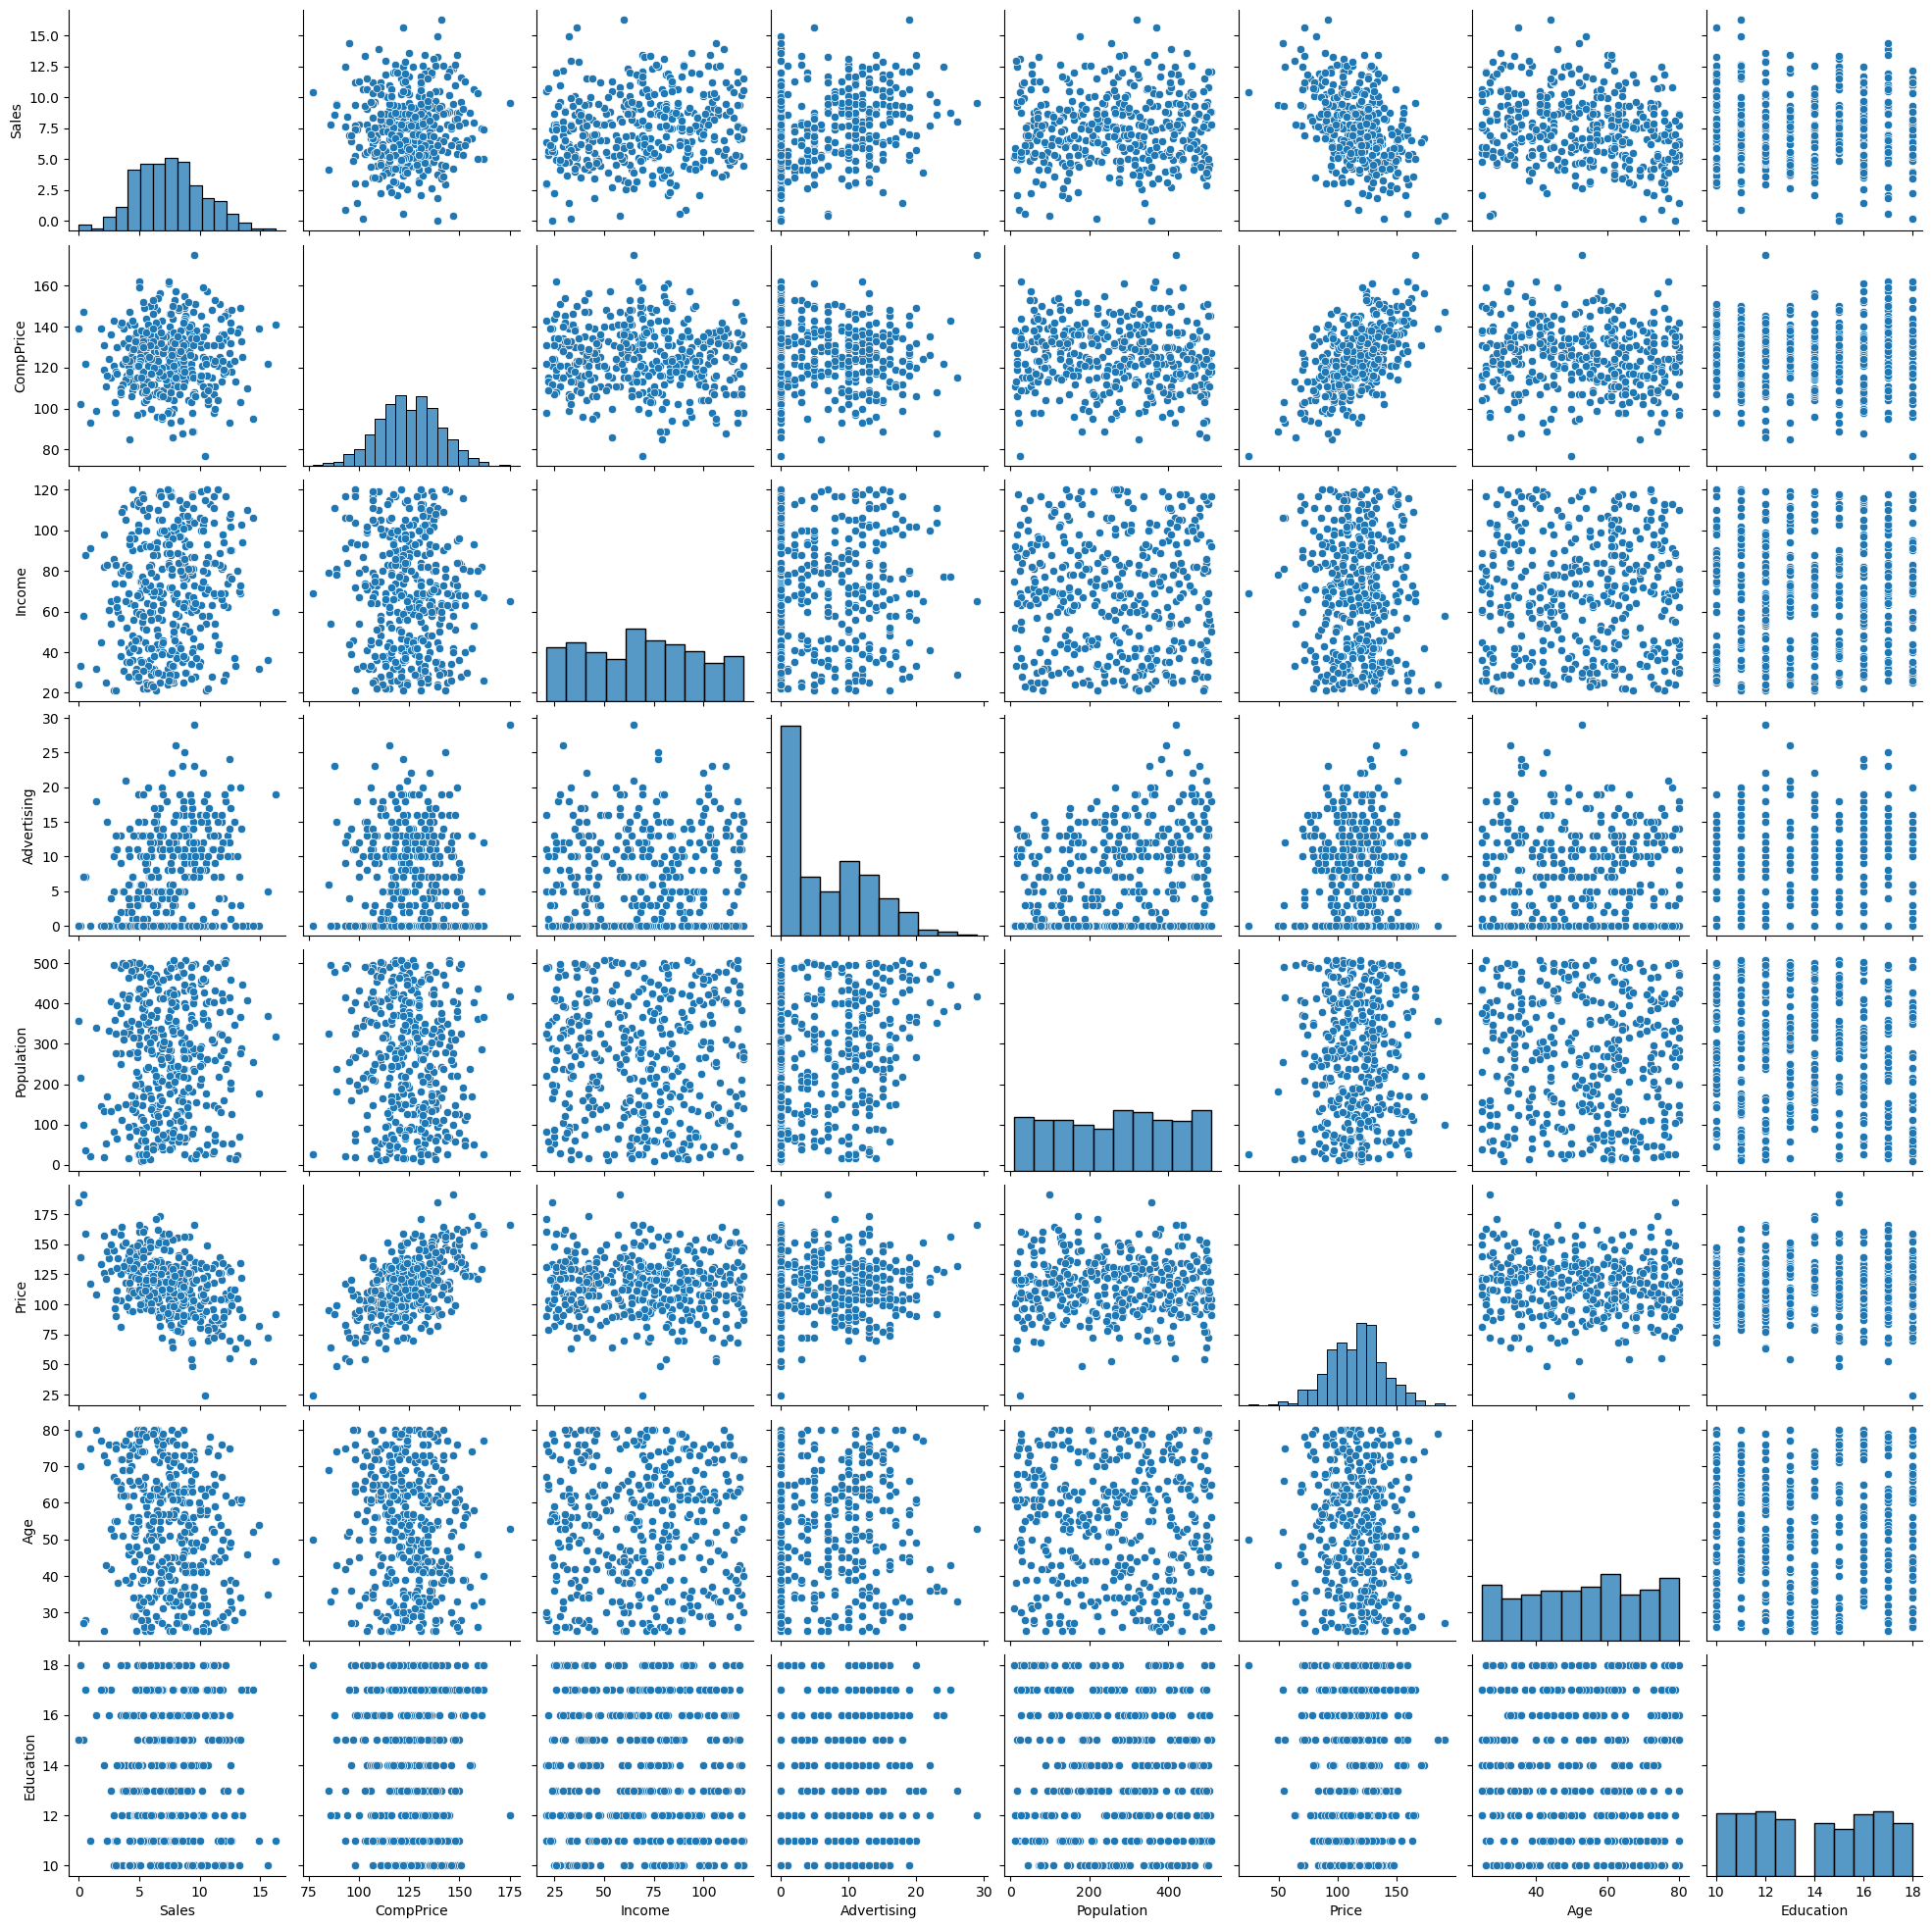

In [8]:
sns.pairplot(company)

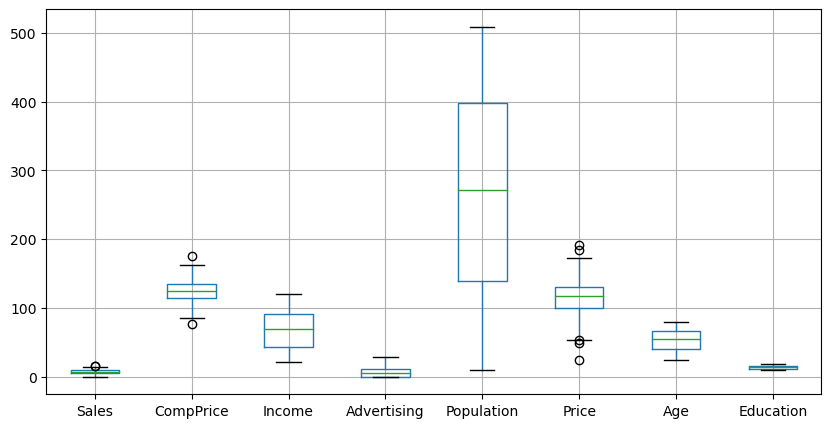

In [9]:
plt.figure(figsize=(10,5))
company.boxplot()
plt.show()

In [10]:
cols = company.columns
def treatoutliers(company, cols):
    for col in cols:
        
        Q1 = company[col].quantile(0.25)
        Q3 = company[col].quantile(0.75)
        IQR = Q3-Q1
        
        upper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        
        company[col] = np.where(company[col]>upper,upper,np.where(company[col]<lower,lower,company[col]))

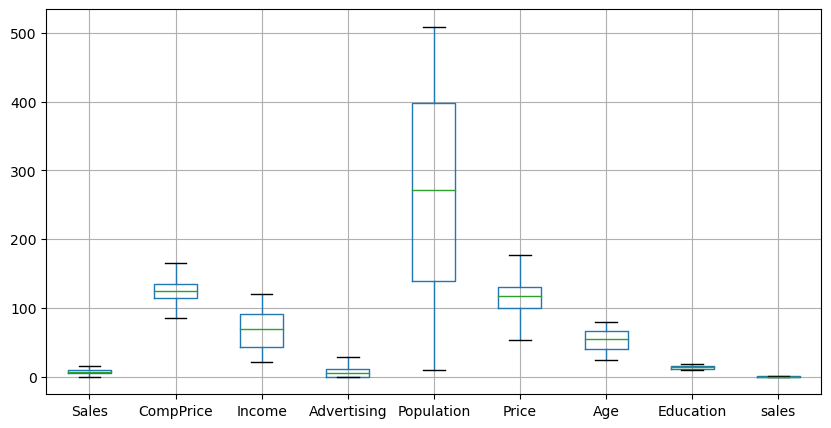

In [16]:
plt.figure(figsize=(10,5))
company.boxplot()
plt.show()

In [13]:
company['Sales'].describe()

count    400.000000
mean       7.492650
std        2.813453
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       15.215000
Name: Sales, dtype: float64

In [14]:
company['sales'] = 0
company.loc[company['Sales'] > 7.49, "sales"]=1
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42,17,Yes,Yes,1
1,11.22,111.0,48.0,16.0,260.0,83.0,Good,65,10,Yes,Yes,1
2,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59,12,Yes,Yes,1
3,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55,14,Yes,Yes,0
4,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38,13,Yes,No,0


In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])


In [18]:
company['ShelveLoc']=company['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [19]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138.0,73.0,11.0,276.0,120.0,3,42,17,1,1,1
1,11.22,111.0,48.0,16.0,260.0,83.0,1,65,10,1,1,1
2,10.06,113.0,35.0,10.0,269.0,80.0,2,59,12,1,1,1
3,7.40,117.0,100.0,4.0,466.0,97.0,2,55,14,1,1,0
4,4.15,141.0,64.0,3.0,340.0,128.0,3,38,13,1,0,0


In [20]:
company1 = company.drop('Sales', axis=1)
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138.0,73.0,11.0,276.0,120.0,3,42,17,1,1,1
1,111.0,48.0,16.0,260.0,83.0,1,65,10,1,1,1
2,113.0,35.0,10.0,269.0,80.0,2,59,12,1,1,1
3,117.0,100.0,4.0,466.0,97.0,2,55,14,1,1,0
4,141.0,64.0,3.0,340.0,128.0,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138.0,108.0,17.0,203.0,128.0,1,33,14,1,1,1
396,139.0,23.0,3.0,37.0,120.0,2,55,11,0,1,0
397,162.0,26.0,12.0,368.0,159.0,2,40,18,1,1,0
398,100.0,79.0,7.0,284.0,95.0,3,50,12,1,1,0


### Scaling

In [21]:
def scale_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [22]:
cd_norm = scale_func(company1)

In [23]:
cd_norm

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.6625,0.525253,0.379310,0.533066,0.536290,1.0,0.309091,0.875,1.0,1.0,1.0
1,0.3250,0.272727,0.551724,0.501002,0.237903,0.0,0.727273,0.000,1.0,1.0,1.0
2,0.3500,0.141414,0.344828,0.519038,0.213710,0.5,0.618182,0.250,1.0,1.0,1.0
3,0.4000,0.797980,0.137931,0.913828,0.350806,0.5,0.545455,0.500,1.0,1.0,0.0
4,0.7000,0.434343,0.103448,0.661323,0.600806,1.0,0.236364,0.375,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.600806,0.0,0.145455,0.500,1.0,1.0,1.0
396,0.6750,0.020202,0.103448,0.054108,0.536290,0.5,0.545455,0.125,0.0,1.0,0.0
397,0.9625,0.050505,0.413793,0.717435,0.850806,0.5,0.272727,1.000,1.0,1.0,0.0
398,0.1875,0.585859,0.241379,0.549098,0.334677,1.0,0.454545,0.250,1.0,1.0,0.0


### Model Building

In [24]:
X = cd_norm.iloc[:,0:10]
Y = cd_norm['sales']

In [25]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.6625,0.525253,0.379310,0.533066,0.536290,1.0,0.309091,0.875,1.0,1.0
1,0.3250,0.272727,0.551724,0.501002,0.237903,0.0,0.727273,0.000,1.0,1.0
2,0.3500,0.141414,0.344828,0.519038,0.213710,0.5,0.618182,0.250,1.0,1.0
3,0.4000,0.797980,0.137931,0.913828,0.350806,0.5,0.545455,0.500,1.0,1.0
4,0.7000,0.434343,0.103448,0.661323,0.600806,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.600806,0.0,0.145455,0.500,1.0,1.0
396,0.6750,0.020202,0.103448,0.054108,0.536290,0.5,0.545455,0.125,0.0,1.0
397,0.9625,0.050505,0.413793,0.717435,0.850806,0.5,0.272727,1.000,1.0,1.0
398,0.1875,0.585859,0.241379,0.549098,0.334677,1.0,0.454545,0.250,1.0,1.0


In [26]:
Y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: sales, Length: 400, dtype: float64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [28]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0.])

In [30]:
y_test

132    1.0
390    0.0
310    1.0
3      0.0
248    0.0
      ... 
381    0.0
53     0.0
229    1.0
303    1.0
37     0.0
Name: sales, Length: 120, dtype: float64

In [31]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
sales,,
0.0,43,25
1.0,15,37


<AxesSubplot:xlabel='col_0', ylabel='sales'>

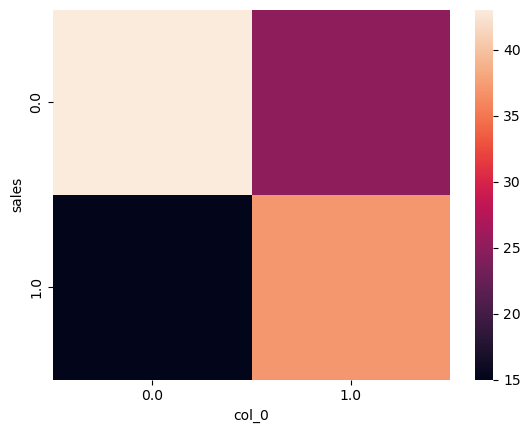

In [32]:
sns.heatmap(pd.crosstab(y_test, y_pred))

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

66.66666666666666

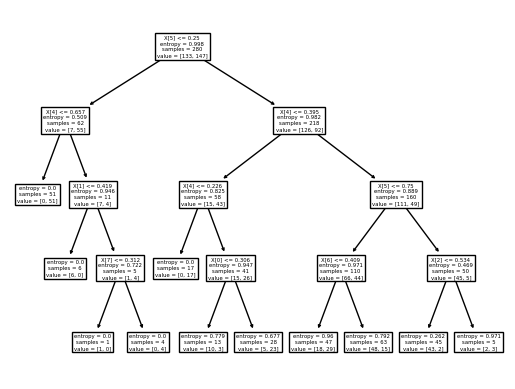

In [34]:
#plot the decision tree
tree.plot_tree(model)
plt.show()

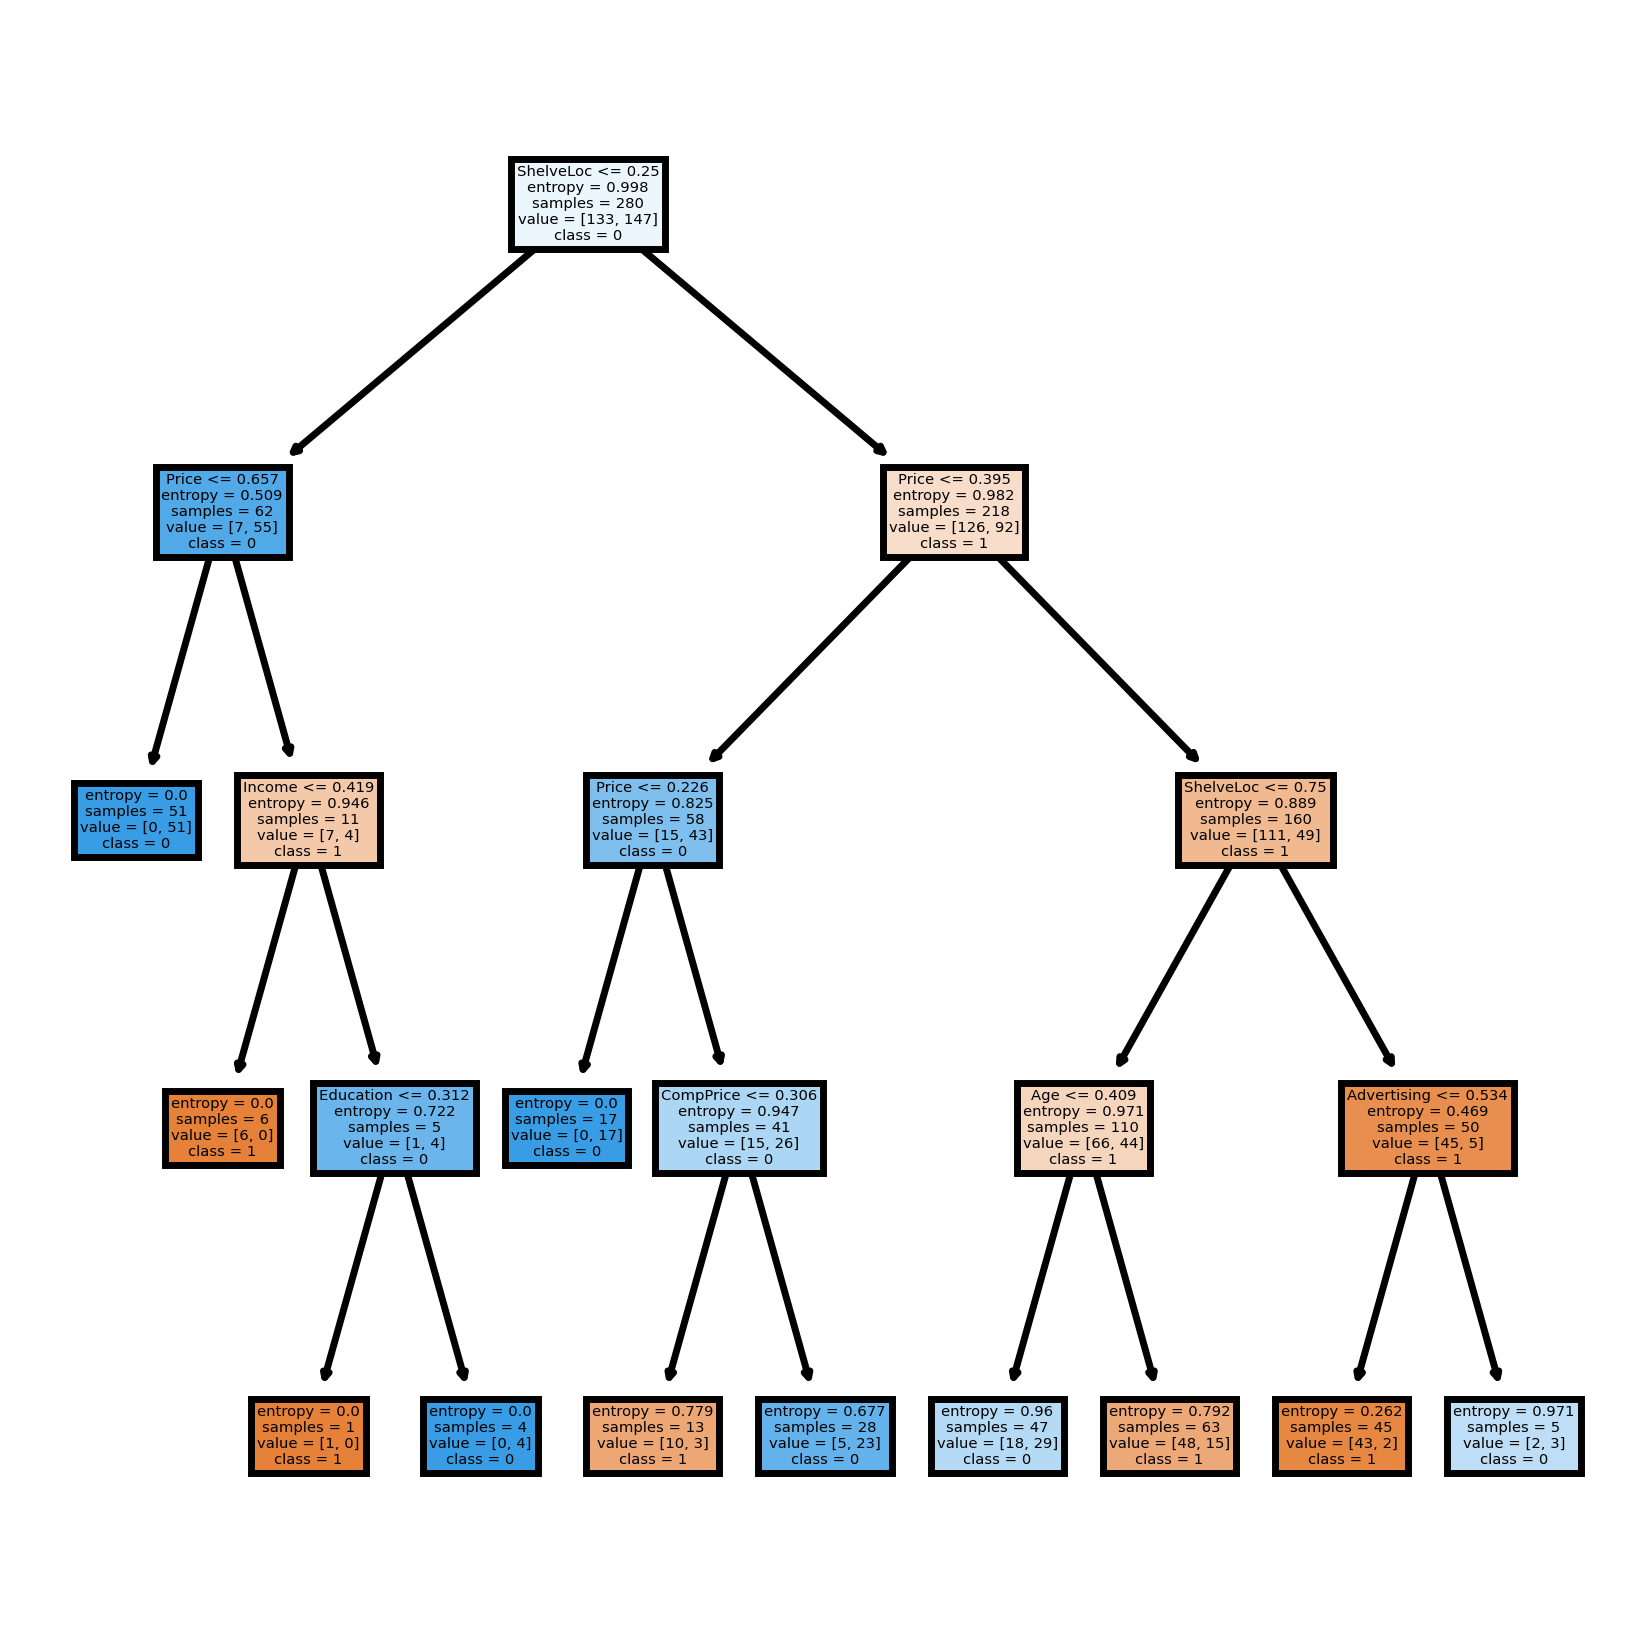

In [35]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['1','0']
fig, axes = plt.subplots(nrows =1, ncols = 1, figsize=(4,4), dpi=500)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True);

### Finding the Best hyper-parameter for the decision tree

In [36]:
# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [37]:
# Define the hyperparameter grid
param_grid = {'criterion' : ['entropy','gini'],
              'max_depth': [2,3,4,5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

In [38]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [39]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7964285714285714
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [40]:
model_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=7,min_samples_split=2,min_samples_leaf=8)
model_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8)

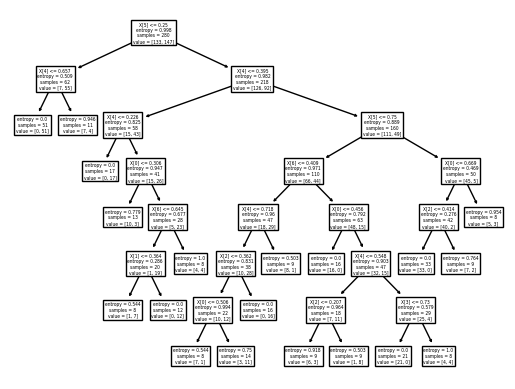

In [41]:
#PLot the decision tree
tree.plot_tree(model_best);
plt.show()

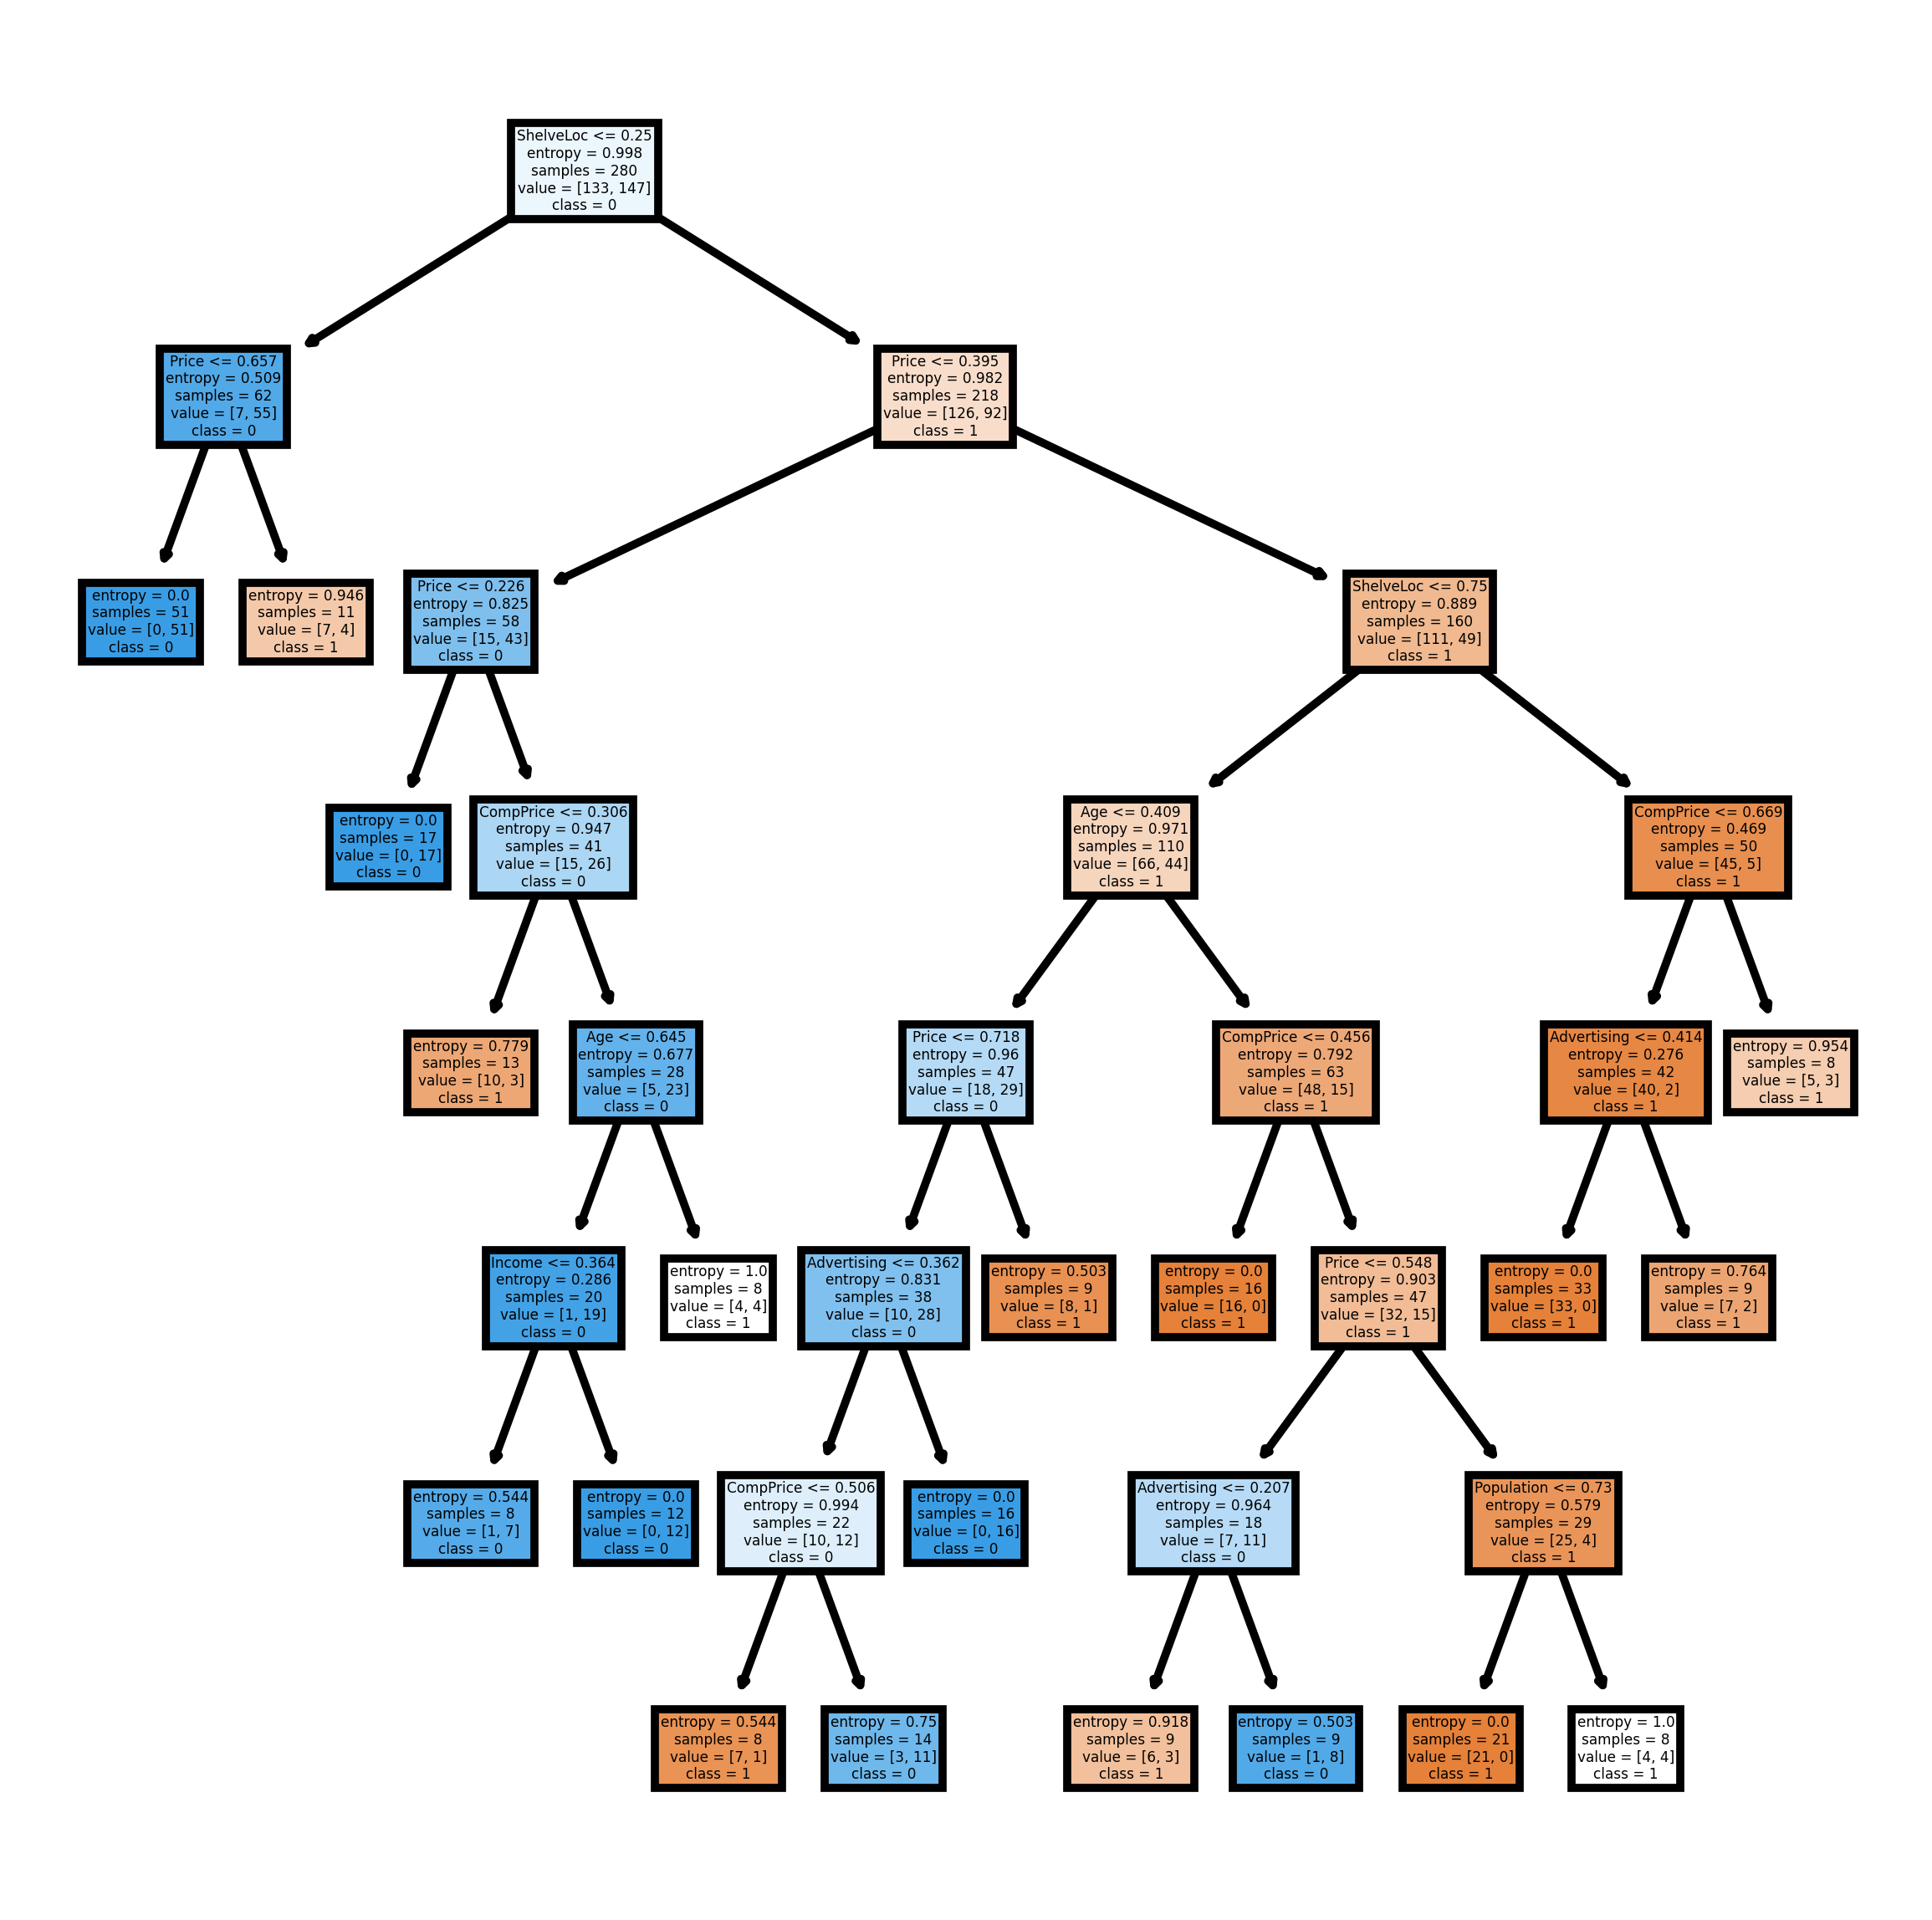

In [42]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700) # dpi is the pixel size
tree.plot_tree(model_best,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [43]:
#Predicting on test data
preds_best = model_best.predict(x_test) # predicting on test data set 
pd.Series(preds_best).value_counts() # getting the count of each category 

0.0    76
1.0    44
dtype: int64

In [44]:
preds_best

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0.])

In [45]:
pd.crosstab(y_test,preds_best) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
sales,,
0.0,56,12
1.0,20,32


<AxesSubplot:xlabel='col_0', ylabel='sales'>

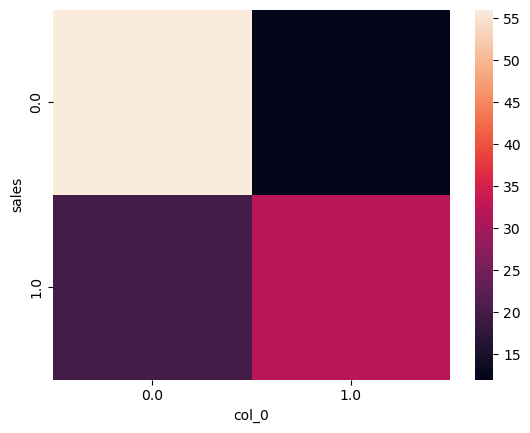

In [47]:
sns.heatmap(pd.crosstab(y_test,preds_best))

In [46]:
print("the accuracy of the model =",accuracy_score(y_test,preds_best)*100)

the accuracy of the model = 73.33333333333333
